<a href="https://colab.research.google.com/github/mezgoodle/TelegramiaStats/blob/master/telegramia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns

# Hero classes

## Getting the data

In [102]:
df = pd.read_json('https://telegramia-api.herokuapp.com/heroclasses')

In [103]:
df.head()

,_id,name,characteristics,choices
0,60fef6e7cede4b58a0ab1c82,Воїн,"{'strength': 10.0, 'agility': 5.0, 'intuition'...",1
1,60fef743cede4b58a0ab1c83,Шахрай,"{'strength': 5.0, 'agility': 10.0, 'intuition'...",12
2,60fef797cede4b58a0ab1c84,Слідопит,"{'strength': 5.0, 'agility': 5.0, 'intuition':...",3
3,60fef817132dc80a96690553,Маг,"{'strength': 5.0, 'agility': 5.0, 'intuition':...",3


## Data pre-processing

In [104]:
df.rename(columns={'_id': 'id'}, inplace=True)

In [105]:
df.isna().sum()

id                 0
name               0
characteristics    0
choices            0
dtype: int64

## Data analysis

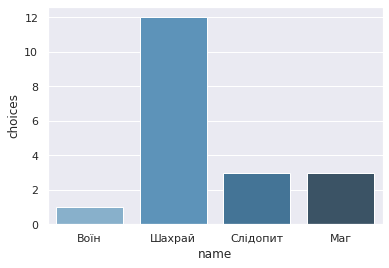

In [106]:
sns.barplot(x='name', y='choices', data=df, palette=('Blues_d'))

As we can see, players choose class **"Шахрай"** most of all and **"Воїн"** least of all.

# Roads

## Getting the data

In [107]:
df = pd.read_json('https://telegramia-api.herokuapp.com/roads')

In [108]:
df.head()

,_id,from_obj,to_obj,name,energy,travelers
0,610e5cfb5045fd6efd063935,Брісвель,Хоул Чиппинг,Дорога на захід,13.4,12
1,610e5db636d932eb3953dd1d,Брісвель,Белсон,Широка лісна дорога,11.7,5
2,61ff7fadbd954c857f36caa1,Брісвель,Dungeon,Дорого у Місячний ліс,13.4,2
3,6200c38df8ab4f7e167bd9da,Dungeon,Брісвель,З Місячного лісу у Брісвель,13.4,9
4,6238449c9a593545ead2857f,Брісвель,raid,На пошуки Долі,1.4,15


## Data pre-processing

In [109]:
df.rename(columns={'_id': 'id'}, inplace=True)

In [110]:
df.isna().sum()

id           0
from_obj     0
to_obj       0
name         0
energy       0
travelers    0
dtype: int64

## Data analysis

[Text(0, 0, 'Дорога на захід'),
 Text(0, 0, 'Широка лісна дорога'),
 Text(0, 0, 'Дорого у Місячний ліс'),
 Text(0, 0, 'З Місячного лісу у Брісвель'),
 Text(0, 0, 'На пошуки Долі'),
 Text(0, 0, 'Назад у Брісвель')]

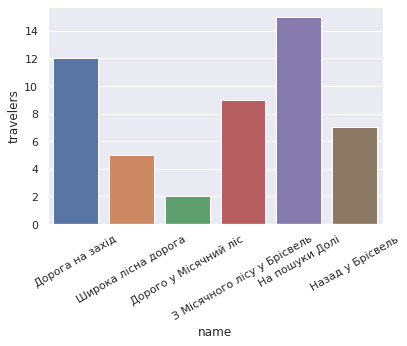

In [111]:
plot = sns.barplot(x='name', y='travelers', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


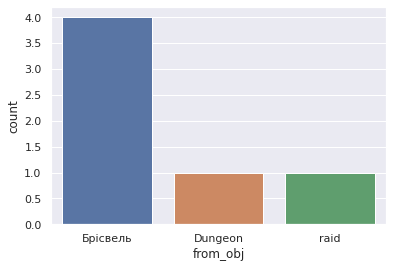

In [113]:
sns.countplot(df['from_obj'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


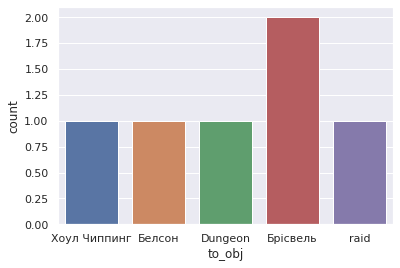

In [114]:
sns.countplot(df['to_obj'])

As we can see, players choose class **"Шахрай"** most of all and **"Воїн"** least of all.

# Roads